In [130]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [102]:
file_path = 'C:/Bigdata/Dashboard/Env/faang_stocks_pandemic_data.csv'
#bitcoin_df = pd.read_csv(file_path)
#bitcoin_df = bitcoin_df.astype({'Close':'float64'})

In [111]:
bitcoin_df = pd.read_csv(file_path)
bitcoin_df = bitcoin_df.groupby(['Name', 'Date', 'Volume', 'Open', 'High', 'Low','Adj Close'])[['Close']].sum().reset_index()

In [112]:
print(bitcoin_df.shape)
print(bitcoin_df.info())

(2840, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2840 non-null   object 
 1   Date       2840 non-null   object 
 2   Volume     2840 non-null   float64
 3   Open       2840 non-null   float64
 4   High       2840 non-null   float64
 5   Low        2840 non-null   float64
 6   Adj Close  2840 non-null   float64
 7   Close      2840 non-null   float64
dtypes: float64(6), object(2)
memory usage: 177.6+ KB
None


In [113]:
bitcoin_df.tail()

,Name,Date,Volume,Open,High,Low,Adj Close,Close
2835,Netflix,2022-03-28,4323400.0,375.230011,380.279999,366.730011,378.510010,378.510010
2836,Netflix,2022-03-29,5880700.0,384.390015,396.500000,380.329987,391.820007,391.820007
2837,Netflix,2022-03-30,4023300.0,389.549988,392.700012,378.630005,381.470001,381.470001
2838,Netflix,2022-03-31,4134700.0,383.589996,384.000000,373.609985,374.589996,374.589996
2839,Netflix,2022-04-01,4639800.0,376.799988,380.869995,368.500000,373.470001,373.470001


In [114]:
# to_datetime으로 Date 피쳐를 시계열 피쳐로 변경
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Date 데이터프레임의 index로 설정
bitcoin_df.index = bitcoin_df['Date']
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.head()

,Name,Volume,Open,High,Low,Adj Close,Close
Date,,,,,,,
2020-01-02,Amazon,4029000.0,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010
2020-01-03,Amazon,3764400.0,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971
2020-01-06,Amazon,4061800.0,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005
2020-01-07,Amazon,4044900.0,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985
2020-01-08,Amazon,3508000.0,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971


In [115]:
bitcoin_df.describe()

,Volume,Open,High,Low,Adj Close,Close
count,2.840000e+03,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000
mean,3.099634e+07,1195.034564,1209.156423,1180.196246,1194.732621,1194.873321
std,5.338770e+07,1199.645063,1212.303369,1185.486963,1198.950567,1198.823284
min,4.656000e+05,57.020000,57.125000,53.152500,55.332169,56.092499
25%,2.771200e+06,228.807503,232.245003,224.582500,229.680000,229.680000
50%,5.637150e+06,502.580002,508.634995,495.050003,502.234985,502.234985
75%,2.657248e+07,2361.729980,2376.017517,2322.380005,2352.322449,2352.322449
max,4.265100e+08,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912


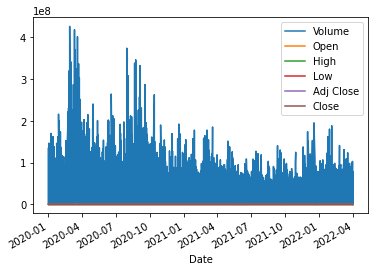

In [116]:
bitcoin_df.plot()
plt.show()

In [122]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin_df.Close.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

TypeError: fit() got an unexpected keyword argument 'trend'

In [118]:
bitcoin_df1= bitcoin_df.corr(method='pearson')
bitcoin_df1

,Volume,Open,High,Low,Adj Close,Close
Volume,1.000000,-0.459130,-0.459363,-0.459144,-0.459518,-0.459340
Open,-0.459130,1.000000,0.999896,0.999882,0.999751,0.999751
High,-0.459363,0.999896,1.000000,0.999854,0.999883,0.999883
Low,-0.459144,0.999882,0.999854,1.000000,0.999885,0.999885
Adj Close,-0.459518,0.999751,0.999883,0.999885,1.000000,1.000000
Close,-0.459340,0.999751,0.999883,0.999885,1.000000,1.000000


In [123]:
pd.pivot_table(data=bitcoin_df, index = 'Date', values='Open', aggfunc='sum')
#https://www.youtube.com/watch?v=ZwjMJyA3r5s

,Open
Date,
2020-01-02,3830.320038
2020-01-03,3820.777504
2020-01-06,3814.897499
2020-01-07,3929.209969
2020-01-08,3911.639977
...,...
2022-03-28,6887.040024
2022-03-29,7047.779907
2022-03-30,7016.399887


In [124]:
p1 = pd.pivot_table(data=bitcoin_df, index = 'Date', values='Open', aggfunc='sum')


<AxesSubplot:xlabel='Date', ylabel='Open'>

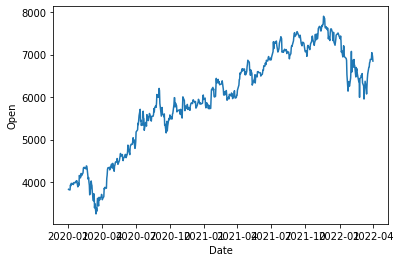

In [131]:
sns.lineplot(data=p1, x='Date', y='Open')